In [1]:
# Importing necessary libraries

# numpy is used for numerical operations on large, multi-dimensional arrays and matrices
import numpy as np

# pandas is used for data manipulation and analysis, especially for working with tabular data (like spreadsheets)
import pandas as pd

# seaborn is a statistical data visualization library based on matplotlib, providing a high-level interface
import seaborn as sns

# matplotlib.pyplot is used for creating static, animated, and interactive visualizations in Python
import matplotlib.pyplot as plt

# train_test_split is used to split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

# LinearRegression is used to perform linear regression, which models the relationship between a dependent and independent variable
from sklearn.linear_model import LinearRegression

# StandardScaler is used to standardize features by removing the mean and scaling to unit variance
from sklearn.preprocessing import StandardScaler

# RandomForestRegressor is an ensemble learning method that constructs multiple decision trees for regression
from sklearn.ensemble import RandomForestRegressor

# mean_squared_error and r2_score are used to evaluate the performance of regression models
from sklearn.metrics import mean_squared_error, r2_score

# DecisionTreeRegressor is a decision tree-based regression model that splits data into subsets based on feature values
from sklearn.tree import DecisionTreeRegressor

# tree is part of sklearn, used to work with decision trees and visualize them
from sklearn import tree

# Image and pydotplus are used to display and visualize decision trees graphically
from IPython.display import Image
import pydotplus

# xgboost is an optimized machine learning library used for gradient boosting algorithms, particularly for regression and classification tasks
import xgboost as xgb

# warnings.filterwarnings is used to suppress unnecessary warning messages in the output
import warnings
warnings.filterwarnings("ignore")


In [2]:
# Reading the dataset from a CSV file into a pandas DataFrame
# The dataset 'Movie_regression.csv' contains information that will be used for regression tasks (predicting continuous values)
data = pd.read_csv("Movie_regression.csv")

# Displaying the first 10 rows of the dataset to understand the structure and get a glimpse of the data
data.head(10)

# Displaying the summary information about the dataset, including column names, data types, and non-null counts
# This helps in understanding if there are missing values or data type inconsistencies
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  3D_available         506 non-null    object 
 12  Time_taken           494 non-null    float64
 13  Twitter_hastags      506 non-null    float64
 14  Genre                506 non-null    object 
 15  Avg_age_actors       506 non-null    int

In [3]:
# Calculating the mean of the "Time_taken" column
# This is done to determine the average value of this feature, which will be used to fill any missing values
data["Time_taken"].mean()

# Filling any missing values (NaN) in the "Time_taken" column with the mean value calculated above
# This ensures that the dataset has no missing values in this column and maintains consistency in the model
data["Time_taken"].fillna(value=data["Time_taken"].mean(), inplace=True)

# Displaying the dataset information again after filling missing values
# This is to verify that the missing values have been successfully handled and that the data is complete
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  3D_available         506 non-null    object 
 12  Time_taken           506 non-null    float64
 13  Twitter_hastags      506 non-null    float64
 14  Genre                506 non-null    object 
 15  Avg_age_actors       506 non-null    int

In [4]:
# Converting the "Budget" values from lakhs to crores by dividing by 100
# Assuming the original "Budget" values are in lakhs (which is a common unit), dividing by 100 converts them to crores
data["Budget"] = data["Budget"] / 100

# Similarly, converting the "Collection" values from lakhs to crores by dividing by 100
# This assumes the "Collection" values are also in lakhs and converts them to crores for consistency in scale
data["Collection"] = data["Collection"] / 100


In [6]:
# Displaying the first 5 rows of the dataset using the head() method
# This helps in quickly inspecting the first few records of the dataset, including their features and values
# It is useful for verifying that the data has been loaded correctly and to get an overview of the columns and their corresponding data
data.head()


,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection
0,20.1264,59.62,0.462,365.24125,138.7,7.825,8.095,7.910,7.995,7.94,527367,YES,109.60,223.840,Thriller,23,494,480.0
1,20.5462,69.14,0.531,356.68655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,146.64,243.456,Drama,42,462,432.0
2,20.5458,69.14,0.531,399.12675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,147.88,2022.400,Comedy,38,458,694.0
3,20.6474,59.36,0.542,388.73890,119.3,6.895,7.035,6.920,7.020,8.26,516279,YES,185.36,225.344,Drama,45,472,668.0
4,21.3810,59.36,0.542,397.01585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,176.48,225.792,Drama,55,395,724.0


<Axes: xlabel='Genre', ylabel='count'>

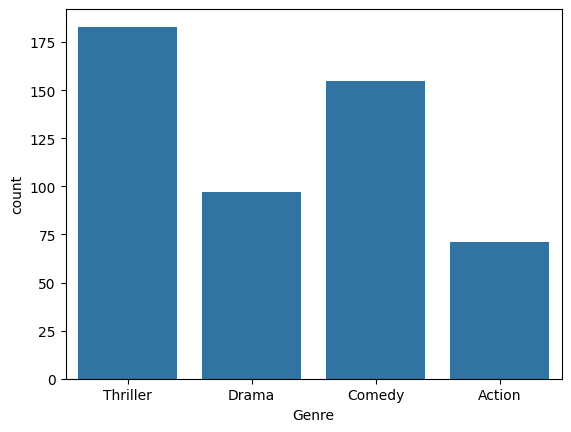

In [5]:
# Creating a count plot using seaborn to visualize the frequency distribution of different movie genres
# 'x = "Genre"' specifies that the "Genre" column will be used on the x-axis, showing the different genres
# 'data = data' tells seaborn to use the 'data' DataFrame for plotting
# This plot will display how many movies belong to each genre, helping in understanding the distribution of genres in the dataset
sns.countplot(x = "Genre", data = data)


<Axes: xlabel='3D_available', ylabel='count'>

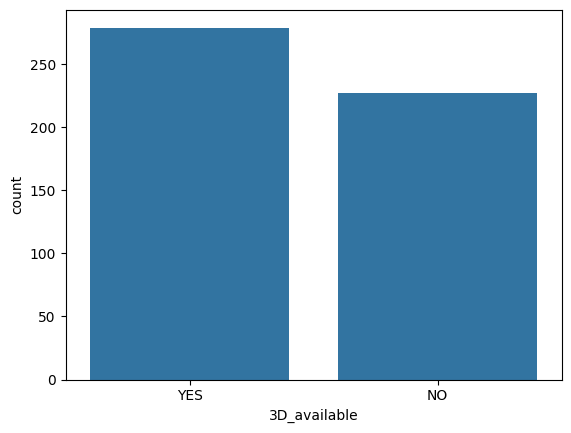

In [7]:
# Creating a count plot to visualize the distribution of movies based on the "3D_available" feature
# 'x = "3D_available"' specifies that the x-axis will represent whether a movie is available in 3D or not
# 'data = data' tells seaborn to use the 'data' DataFrame for plotting
# This plot will show how many movies have 3D availability (e.g., 'Yes' or 'No'), helping in understanding the presence of this feature across the dataset
sns.countplot(x = "3D_available", data = data)


Text(0.5, 1.0, 'Collection Vs Actor Rating')

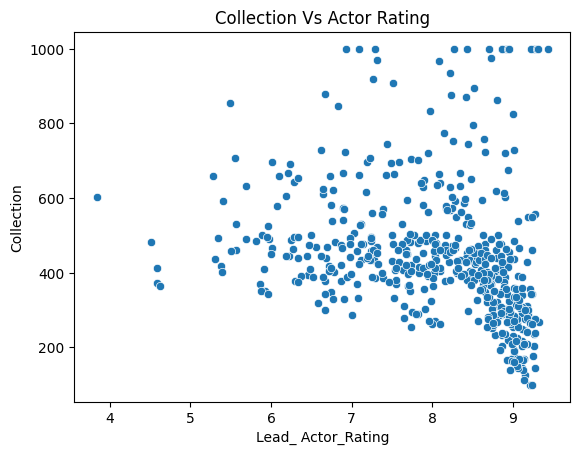

In [8]:
# Creating a scatter plot using seaborn to visualize the relationship between the "Lead_Actor_Rating" and the "Collection"
# 'x = "Lead_Actor_Rating"' specifies that the actor rating will be plotted on the x-axis
# 'y = "Collection"' specifies that the movie's collection (box office revenue) will be plotted on the y-axis
# 'data = data' tells seaborn to use the 'data' DataFrame for this plot
# This scatter plot helps in identifying any correlation between the lead actor's rating and the movie's collection
sns.scatterplot(x = "Lead_ Actor_Rating", y = "Collection", data = data)

# Adding a title to the plot for better understanding of the visualization
# The title describes what the plot represents: the relationship between movie collections and lead actor ratings
plt.title("Collection Vs Actor Rating")


Text(0.5, 1.0, 'Multiplexes vs Collection')

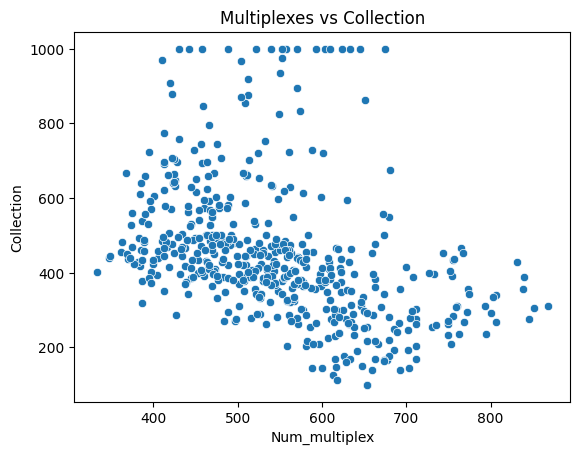

In [10]:
# Creating a scatter plot using seaborn to visualize the relationship between the "Num_multiplex" (number of multiplexes) and the "Collection"
# 'x = "Num_multiplex"' specifies that the number of multiplexes will be plotted on the x-axis
# 'y = "Collection"' specifies that the movie's collection (box office revenue) will be plotted on the y-axis
# 'data = data' tells seaborn to use the 'data' DataFrame for this plot
# This scatter plot helps to analyze how the number of multiplexes affects the movie's collection
sns.scatterplot(x = "Num_multiplex", y = "Collection", data = data)

# Adding a title to the plot for clear understanding of the visualization
# The title describes what the plot represents: the relationship between the number of multiplexes and movie collections
plt.title("Multiplexes vs Collection")


Text(0.5, 1.0, 'Budget Spent vs Collection')

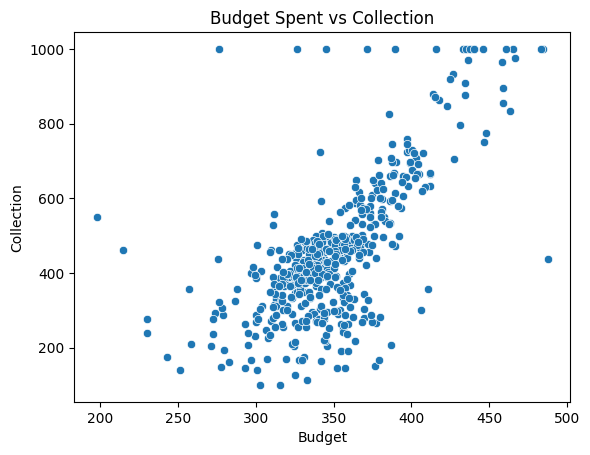

In [11]:
# Creating a scatter plot using seaborn to visualize the relationship between the "Budget" and the "Collection"
# 'x = "Budget"' specifies that the budget spent on the movie will be plotted on the x-axis
# 'y = "Collection"' specifies that the movie's collection (box office revenue) will be plotted on the y-axis
# 'data = data' tells seaborn to use the 'data' DataFrame for this plot
# This scatter plot helps analyze how the budget of a movie impacts its box office collection
sns.scatterplot(x = "Budget", y = "Collection", data = data)

# Adding a title to describe the visualization, indicating the relationship between budget and collection
plt.title("Budget Spent vs Collection")


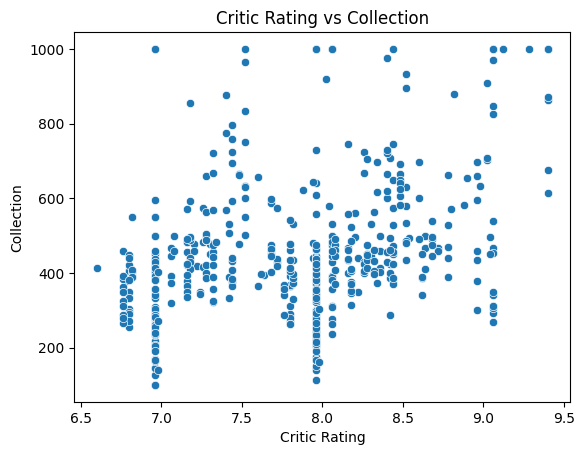

In [12]:
# Creating a scatter plot using seaborn to visualize the relationship between "Critic_rating" and "Collection"
# 'x = "Critic_rating"' specifies that the critic rating will be plotted on the x-axis
# 'y = "Collection"' specifies that the movie's collection (box office revenue) will be plotted on the y-axis
# 'data = data' tells seaborn to use the 'data' DataFrame for this plot
# This scatter plot helps to analyze how the critic ratings affect the movie's box office collection
sns.scatterplot(x = "Critic_rating", y = "Collection", data = data)

# Adding a title to the plot for better understanding of the visualization
plt.title("Critic Rating vs Collection")

# Labeling the x-axis as "Critic Rating" for clarity
plt.xlabel("Critic Rating")

# Labeling the y-axis as "Collection" to indicate what is being measured
plt.ylabel("Collection")

# Displaying the plot to the user
# This will render the scatter plot in the output cell of the notebook
plt.show()


In [13]:
# Displaying the first 5 rows of the dataset to get a quick overview of the current state of the data
# This is useful for checking the dataset before any transformation is applied
data.head()

# Converting categorical variables into dummy/indicator variables using pandas get_dummies method
# This is done for the columns "3D_available" and "Genre" to prepare the dataset for machine learning models
# The get_dummies function will create binary columns for each unique category in these columns
# For example, if "Genre" has values like 'Action', 'Drama', and 'Comedy', three new columns will be created,
# with 1s and 0s indicating the presence of each genre for each row
data = pd.get_dummies(data, columns=["3D_available", "Genre"])

# Displaying the first 20 rows of the transformed dataset to check the newly created dummy variables
# This helps in verifying that the transformation has been applied correctly and to inspect the updated structure of the data
data.head(20)


,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,...,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,3D_available_NO,3D_available_YES,Genre_Action,Genre_Comedy,Genre_Drama,Genre_Thriller
0,20.1264,59.62,0.462,365.24125,138.7,7.825,8.095,7.910,7.995,7.94,...,223.840,23,494,480.0,False,True,False,False,False,True
1,20.5462,69.14,0.531,356.68655,152.4,7.505,7.650,7.440,7.470,7.44,...,243.456,42,462,432.0,True,False,False,False,True,False
2,20.5458,69.14,0.531,399.12675,134.6,7.485,7.570,7.495,7.515,7.44,...,2022.400,38,458,694.0,True,False,False,True,False,False
3,20.6474,59.36,0.542,388.73890,119.3,6.895,7.035,6.920,7.020,8.26,...,225.344,45,472,668.0,False,True,False,False,True,False
4,21.3810,59.36,0.542,397.01585,127.7,6.920,7.070,6.815,7.070,8.26,...,225.792,55,395,724.0,True,False,False,False,True,False
5,20.5970,59.36,0.542,357.18650,132.2,6.890,7.100,6.885,7.005,7.26,...,284.592,53,460,574.0,False,True,False,True,False,False
6,21.7658,70.74,0.476,333.96660,140.1,7.065,7.265,7.150,7.400,8.96,...,243.664,41,522,458.0,False,True,False,False,False,True
7,22.8910,70.74,0.476,342.85460,169.6,6.980,7.075,6.875,7.170,7.96,...,243.536,56,571,442.0,True,False,False,False,True,False
8,24.2248,70.74,0.476,312.80205,173.5,6.910,7.075,6.850,7.000,7.96,...,242.640,55,564,330.0,False,True,False,True,False,False
9,23.4008,70.74,0.476,333.52220,159.4,6.665,6.725,6.575,6.855,7.96,...,283.024,45,508,378.0,False,True,False,False,False,True


In [14]:
# Dropping specific columns from the dataset that are deemed unnecessary for the analysis or modeling
# The columns being dropped are:
# - "Multiplex coverage": possibly redundant or less informative
# - "Time_taken": might not be relevant for the prediction task
# - "Num_multiplex": similar to "Multiplex coverage", may not add value to the model
# - "3D_available_NO": one of the dummy variables created for "3D_available"; typically, one category is dropped to avoid multicollinearity
# The 'axis=1' parameter indicates that these columns are to be dropped (as opposed to rows)
data = data.drop(["Multiplex coverage", "Time_taken", "Num_multiplex", "3D_available_NO"], axis=1)

# Getting the shape of the updated dataset, which returns a tuple representing the number of rows and columns
# This helps to verify how many features (columns) remain in the dataset after dropping the specified columns
data.shape


(506, 18)

In [15]:
# Selecting all columns from the DataFrame except the "Collection" column to create the feature set (X)
# 'data.loc[:, data.columns != "Collection"]' is used to filter the columns; ':' indicates all rows,
# and 'data.columns != "Collection"' ensures all columns except "Collection" are included
x = data.loc[:, data.columns != "Collection"]

# Displaying the first 5 rows of the feature set (X) to verify the selected features
# This helps ensure that the correct features have been selected for model training
x.head()

# Selecting the "Collection" column as the target variable (y) for the prediction task
# This column contains the values we aim to predict based on the features in X
y = data["Collection"]

# Displaying the first 5 rows of the target variable (y) to confirm its values
# This is useful for checking that the target variable has been correctly extracted
y.head()


,Collection
0,480.0
1,432.0
2,694.0
3,668.0
4,724.0


In [16]:
# Printing the shape of the feature set (X) to display the number of rows and columns
# This helps to understand how many features will be used for training the model and confirms the structure of the data
print(x.shape)

# Printing the shape of the target variable (y) to display the number of rows
# This ensures that the target variable aligns with the feature set in terms of the number of samples (rows)
print(y.shape)


(506, 17)
(506,)


In [17]:
# Printing the shape of the feature set (X) to see how many samples (rows) and features (columns) it contains
print(x.shape)

# Printing the shape of the target variable (y) to check the number of samples it has
# This should match the number of rows in X, confirming that each feature corresponds to a target value
print(y.shape)

# Splitting the dataset into training and testing sets using train_test_split from sklearn
# 'test_size=0.2' indicates that 20% of the data will be used for testing, while 80% will be used for training
# 'random_state=0' ensures that the split is reproducible; the same random seed will yield the same split each time
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Printing the shape of the training feature set (X_train) to check how many samples and features are in the training set
print(x_train.shape)

# Printing the shape of the testing feature set (X_test) to check how many samples and features are in the testing set
print(x_test.shape)


(506, 17)
(506,)
(404, 17)
(102, 17)


In [18]:
# Creating an instance of the StandardScaler class from sklearn
# This scaler standardizes features by removing the mean and scaling to unit variance
# This is important for models that are sensitive to the scale of the input features
scaler = StandardScaler()

# Fitting the scaler to the training feature set (X_train) and transforming it
# 'fit_transform' computes the mean and standard deviation from the training data and scales it
# The result is stored in X_train_scaled, which now contains standardized values for the training set
X_train_scaled = scaler.fit_transform(x_train)

# Transforming the testing feature set (X_test) using the same scaler
# 'transform' scales the testing data based on the mean and standard deviation calculated from the training data
# This ensures that the training and testing sets are on the same scale without introducing data leakage
X_test_scaled = scaler.transform(x_test)


In [19]:
# Creating an instance of the XGBRegressor model from the XGBoost library
# - 'objective='reg:squarederror'' specifies that the model will perform regression using squared error as the loss function
# - 'max_depth=5' sets the maximum depth of the individual trees; limiting depth helps prevent overfitting
# - 'n_estimators=100' indicates that the model will build 100 trees in the ensemble
# - 'learning_rate=0.1' controls the contribution of each tree; a smaller value makes the model more robust to overfitting
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', max_depth=5, n_estimators=100, learning_rate=0.1)

# Fitting the XGBoost model to the scaled training data
# This trains the model using the training features (X_train_scaled) and corresponding target values (y_train)
# During this process, the model learns the relationship between the features and the target variable
xgb_model.fit(X_train_scaled, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [20]:
# Making predictions using the trained XGBoost model on the scaled testing data
# 'predict' method is called with the scaled test features (X_test_scaled) as input
# This generates predicted values for the target variable (y) based on the patterns learned during training
y_pred = xgb_model.predict(X_test_scaled)


In [21]:
# Creating an instance of the DecisionTreeRegressor model from sklearn
# - 'max_depth=3' sets the maximum depth of the decision tree to 3, which helps prevent overfitting
#   by limiting the complexity of the model
model = DecisionTreeRegressor(max_depth=3)

# Fitting the decision tree model to the training data
# This trains the model using the original training features (x_train) and the corresponding target values (y_train)
# During this process, the model learns how to split the data based on feature values to predict the target variable
model.fit(x_train, y_train)

# Making predictions on the testing data using the trained decision tree model
# 'predict' method is called with the testing features (x_test) as input
# This generates predicted values for the target variable (y) based on the learned decision rules
pred = model.predict(x_test)

# Printing the predicted values generated by the decision tree model for the test set
print(pred)


[ 461.87356322 1000.          461.87356322  235.14285714  461.87356322
  461.87356322  461.87356322  461.87356322  461.87356322  461.87356322
  235.14285714  235.14285714  235.14285714  235.14285714  918.60869565
  651.83333333  461.87356322  651.83333333  461.87356322  461.87356322
  461.87356322  461.87356322  461.87356322  461.87356322  461.87356322
 1000.          461.87356322  351.37777778  918.60869565  351.37777778
  235.14285714  235.14285714  461.87356322  461.87356322  461.87356322
  351.37777778  235.14285714 1000.          235.14285714  235.14285714
  461.87356322  461.87356322  461.87356322  235.14285714  461.87356322
  461.87356322  351.37777778  351.37777778  351.37777778  461.87356322
  351.37777778  351.37777778  461.87356322  438.          351.37777778
  351.37777778  461.87356322  461.87356322  461.87356322  351.37777778
  461.87356322  461.87356322  651.83333333  461.87356322  235.14285714
  461.87356322  351.37777778  351.37777778  288.          461.87356322
  461.

In [26]:
# Calculating the Mean Squared Error (MSE) between the actual target values (y_test) and the predicted values (y_pred)
# This metric quantifies the average squared difference between predicted and actual values,
# where a lower MSE indicates better predictive performance of the model
mean_squared_error(y_test, y_pred)

# Calculating the R-squared score (r2) to evaluate how well the model's predictions explain the variability in the target variable
# R-squared values range from 0 to 1, with values closer to 1 indicating that a larger proportion of variance is explained by the model
r2s = r2_score(y_test, y_pred)

# Printing the R-squared score to the console for interpretation
# This score helps assess the effectiveness of the model in capturing the relationship between features and the target variable
print(r2s)


0.7401773015363087


In [27]:
# Rounding the R-squared score (r2s) to two decimal places for easier readability
# 'round(r2s, 2)' rounds the R-squared value to two decimal places
# 'str()' converts the rounded number into a string format for printing
r2s = str(round(r2s, 2))

# Printing the rounded R-squared score to the console
# This makes the output of the R-squared value more concise and easy to interpret
print(r2s)


0.74


In [28]:
# Calculating the numerator for the adjusted R-squared formula
# This represents the penalty for adding additional predictors to the model; (1 - 0.95) gives the value
# for 1 minus the R-squared value, and multiplying by 505 (the total number of observations) gives the total penalty
a = (1 - 0.95) * (505)
print(a)  # Printing the calculated penalty value

# Calculating the denominator for the adjusted R-squared formula
# The formula considers the total number of observations (506) minus the number of predictors (17) minus 1
# (to account for the intercept term in the regression model)
b = 506 - 17 - 1
print(b)  # Printing the calculated denominator value

# Calculating the ratio for the adjusted R-squared formula
# This ratio compares the penalty to the degrees of freedom (the denominator 'b')
c = a / b
print(c)  # Printing the calculated ratio value

# Calculating the adjusted R-squared value
# The adjusted R-squared is calculated as 1 minus the ratio (c) derived from the above calculations
adj_r2 = 1 - c
print(adj_r2)  # Printing the final adjusted R-squared value


25.25000000000002
488
0.05174180327868857
0.9482581967213114


In [29]:
# Printing the adjusted R-squared value as a percentage to indicate model accuracy
# The format string "ACCURACY: %.2f%%" specifies that the value will be printed as a floating-point number
# with two decimal places followed by a percentage sign
# 'adj_r2 * 100' converts the adjusted R-squared value (which is between 0 and 1) into a percentage
print("ACCURACY: %.2f%%" % (adj_r2 * 100))  # Outputting the formatted accuracy to the console


ACCURACY: 94.83%


In [30]:
# Exporting the decision tree model to a DOT format string using export_graphviz from sklearn.tree
# 'model' is the trained decision tree regressor, and 'out_file=None' indicates that we want the output as a string instead of a file
dot_data = tree.export_graphviz(model, out_file=None)

# Creating a graph from the DOT data using pydotplus
# 'graph_from_dot_data' converts the DOT format string into a graph object that can be rendered
graph = pydotplus.graph_from_dot_data(dot_data)

# Displaying the decision tree as a PNG image
# 'create_png()' generates a PNG image of the graph created from the decision tree
# 'Image()' is used to render the image in the notebook output
Image(graph.create_png())

# Displaying the first row of the original dataset to provide context about the data used for training
data.head(1)

# Displaying the first row of the training feature set to inspect the features provided to the model
x_train.head(1)

# Displaying the first row of the training target variable to show the corresponding output for the training set
y_train.head(1)


,Collection
220,534.0


In [31]:
# Defining a function named 'prediction_calculator' that takes one parameter 'n'
# This function will collect inputs for 'n' number of movies and make predictions based on those inputs
def prediction_calculator(n):
    # Looping over the range of n to gather inputs for each movie
    for i in range(n):
        print("\n ENTER THE INPUTS FOR %s st movie: " % (i + 1))  # Prompting the user to enter inputs for the current movie

        # Collecting various input features required for the prediction
        ME = float(input("\nMarketing expense (in crores): "))  # Marketing expense in crores
        PE = float(input("Production expense (in crores): "))  # Production expense in crores
        Budget = float(input("Budget (in crores): "))  # Movie budget in crores
        ML = float(input("Movie Length (in mins): "))  # Length of the movie in minutes
        Act_rate = float(input("Lead Actor rating (1-10 imdb scale): "))  # Lead actor's rating on a scale of 1 to 10
        Actr_rate = float(input("Lead Actress rating (1-10 imdb scale): "))  # Lead actress's rating on a scale of 1 to 10
        DR = float(input("Director rating (1-10 imdb scale): "))  # Director's rating on a scale of 1 to 10
        PR = float(input("Producer rating (1-10 imdb scale): "))  # Producer's rating on a scale of 1 to 10
        CR = float(input("Critic rating (1-10 imdb critic rating scale): "))  # Critic's rating on a scale of 1 to 10
        TV = float(input("Trailer views (in lakhs): "))  # Trailer views in lakhs
        TH = int(input("Twitter hashtags: "))  # Number of Twitter hashtags
        Avg_act = int(input("Average actors: "))  # Average number of actors in the movie
        three_d = int(input("3D (1-yes/0-no): "))  # Indicator for 3D availability (1 for yes, 0 for no)
        genre = input("Genre (action/comedy/drama/thriller): ").lower()  # Genre of the movie, converted to lowercase

        # Genre encoding using one-hot encoding
        # Setting binary values based on the input genre
        if genre == "action":
            ga, gc, gt, gd = 1, 0, 0, 0  # Action genre encoded
        elif genre == "comedy":
            ga, gc, gt, gd = 0, 1, 0, 0  # Comedy genre encoded
        elif genre == "drama":
            ga, gc, gt, gd = 0, 0, 0, 1  # Drama genre encoded
        else:  # Assuming thriller if none of the above
            ga, gc, gt, gd = 0, 0, 1, 0  # Thriller genre encoded

        # Creating an array of input features for prediction
        c = np.array([ME, PE, Budget, ML, Act_rate, Actr_rate, DR, PR, CR, TV, TH, Avg_act, three_d, ga, gc, gd, gt])
        c_scaled = scaler.transform([c])  # Scaling the input features using the previously fitted scaler

        # Making a prediction using the XGBoost model on the scaled input features
        pred = xgb_model.predict(c_scaled)

        # Printing the predicted collection in crores, formatted to two decimal places
        print("PREDICTED COLLECTION (in crores): %.2f" % pred[0])

# Prompting the user for the number of use cases (movies) for which predictions are to be made
use_case = int(input("\n ENTER NUMBER OF USE CASES: "))
# Calling the prediction calculator function with the specified number of use cases
prediction_calculator(use_case)



 ENTER NUMBER OF USE CASES: 1

 ENTER THE INPUTS FOR 1 st movie: 

Marketing expense (in crores): 3
Production expense (in crores): 2
Budget (in crores): 5
Movie Length (in mins): 144
Lead Actor rating (1-10 imdb scale): 6
Lead Actress rating (1-10 imdb scale): 6.5
Director rating (1-10 imdb scale): 5.9
Producer rating (1-10 imdb scale): 5.5
Critic rating (1-10 imdb critic rating scale): 7.4
Trailer views (in lakhs): 54323
Twitter hashtags: 3433
Average actors: 10
3D (1-yes/0-no): 0
Genre (action/comedy/drama/thriller): comedy
PREDICTED COLLECTION (in crores): 441.36
